In [30]:
#Loading pandas and reading our csv file and displaying first five entries and checking for basic inforamtion and null status
import pandas as pd
data=pd.read_csv("Admission_Predict.csv",names=["no","Gre","Toefl","Rating","SOP","LOR","CGPA","Research","Chance"],header=0)
print(data.head())
data.info()

   no  Gre  Toefl  Rating  SOP  LOR  CGPA  Research  Chance
0   1  337    118       4  4.5  4.5  9.65         1    0.92
1   2  324    107       4  4.0  4.5  8.87         1    0.76
2   3  316    104       3  3.0  3.5  8.00         1    0.72
3   4  322    110       3  3.5  2.5  8.67         1    0.80
4   5  314    103       2  2.0  3.0  8.21         0    0.65
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
no          800 non-null int64
Gre         800 non-null int64
Toefl       800 non-null int64
Rating      800 non-null int64
SOP         800 non-null float64
LOR         800 non-null float64
CGPA        800 non-null float64
Research    800 non-null int64
Chance      800 non-null float64
dtypes: float64(4), int64(5)
memory usage: 56.3 KB


In [31]:
#function for converting chance column into text values
def Admission1(admpredict):
    if admpredict>=0 and admpredict<0.25:
        return "No chance"
    elif admpredict>=0.25 and admpredict<0.50:
        return "Slight Chance"
    elif admpredict>=0.50 and admpredict<0.75:
        return "Good Chance"
    else:
        return "Almost Certain"
def Admission2(admpredict):
    if admpredict>=0 and admpredict<0.25:
        return 1
    elif admpredict>=0.25 and admpredict<0.50:
        return 2
    elif admpredict>=0.50 and admpredict<0.75:
        return 3
    else:
        return 4    
data["Prediction1"]=data["Chance"].apply(Admission1)    
data["Prediction2"]=data["Chance"].apply(Admission2)  

In [32]:
data.head()

,no,Gre,Toefl,Rating,SOP,LOR,CGPA,Research,Chance,Prediction1,Prediction2
0,1,337,118,4,4.5,4.5,9.65,1,0.92,Almost Certain,4
1,2,324,107,4,4.0,4.5,8.87,1,0.76,Almost Certain,4
2,3,316,104,3,3.0,3.5,8.00,1,0.72,Good Chance,3
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Almost Certain,4
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Good Chance,3


In [33]:
data["Prediction1"].value_counts(dropna=False)

Good Chance       374
Almost Certain    360
Slight Chance      66
Name: Prediction1, dtype: int64

In [34]:
data.drop(columns="Chance",inplace=True)
X=data.iloc[:,0:8]
#print(X)
y=data.iloc[:,8]
print(y)

0      Almost Certain
1      Almost Certain
2         Good Chance
3      Almost Certain
4         Good Chance
5      Almost Certain
6      Almost Certain
7         Good Chance
8         Good Chance
9       Slight Chance
10        Good Chance
11     Almost Certain
12     Almost Certain
13        Good Chance
14        Good Chance
15        Good Chance
16        Good Chance
17        Good Chance
18        Good Chance
19        Good Chance
20        Good Chance
21        Good Chance
22     Almost Certain
23     Almost Certain
24     Almost Certain
25     Almost Certain
26     Almost Certain
27      Slight Chance
28      Slight Chance
29        Good Chance
            ...      
770       Good Chance
771    Almost Certain
772    Almost Certain
773    Almost Certain
774     Slight Chance
775     Slight Chance
776     Slight Chance
777     Slight Chance
778       Good Chance
779       Good Chance
780    Almost Certain
781       Good Chance
782    Almost Certain
783       Good Chance
784    Alm

# Basic EDA

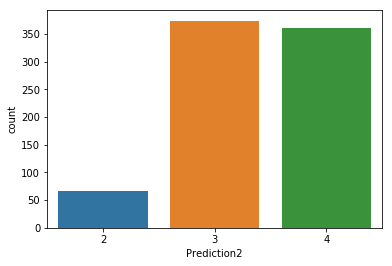

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Prediction2',data=data)
plt.show()

# Brief Analysis of Data

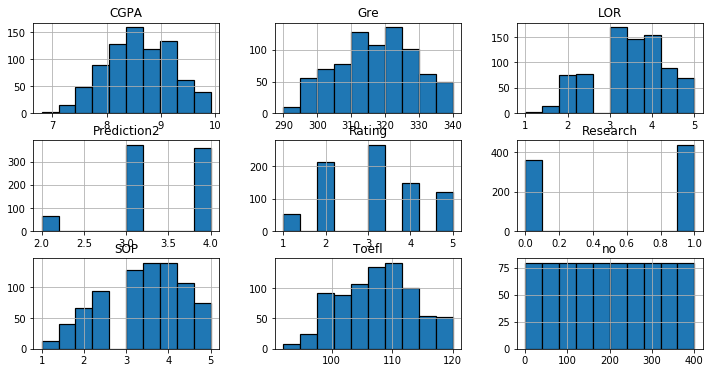

In [36]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

# Box Kind Plot

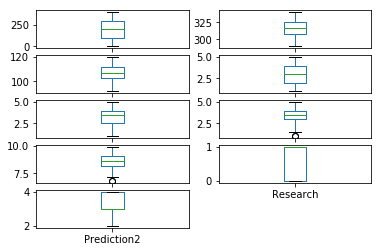

In [37]:
data.plot(kind='box',subplots=True,layout=(5,2))
plt.show()

# Violin Plot 

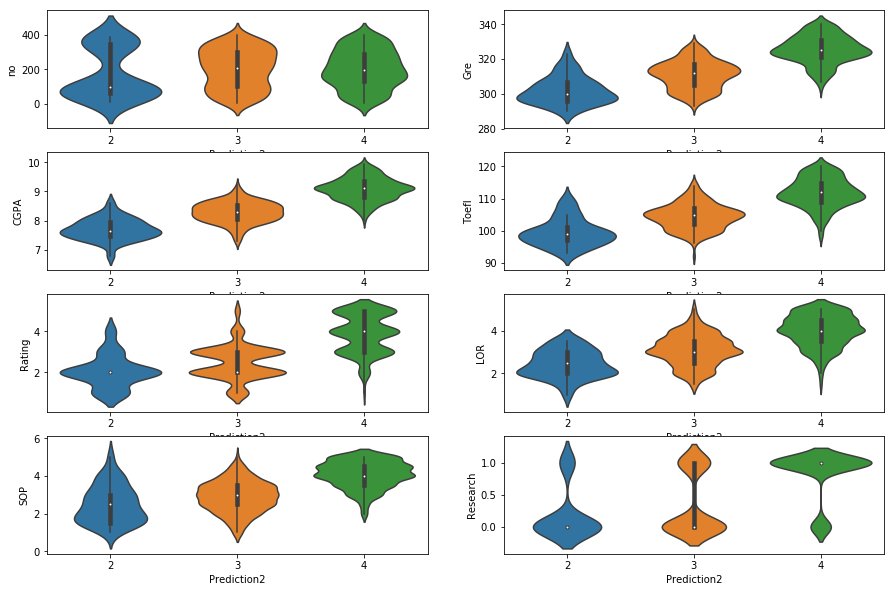

In [38]:
plt.figure(figsize=(15,10))
plt.subplot(4,2,1)
sns.violinplot(x='Prediction2',y='no',data=data)
plt.subplot(4,2,2)
sns.violinplot(x='Prediction2',y='Gre',data=data)
plt.subplot(4,2,3)
sns.violinplot(x='Prediction2',y='CGPA',data=data)
plt.subplot(4,2,4)
sns.violinplot(x='Prediction2',y='Toefl',data=data)
plt.subplot(4,2,5)
sns.violinplot(x='Prediction2',y='Rating',data=data)
plt.subplot(4,2,6)
sns.violinplot(x='Prediction2',y='LOR',data=data)
plt.subplot(4,2,7)
sns.violinplot(x='Prediction2',y='SOP',data=data)
plt.subplot(4,2,8)
sns.violinplot(x='Prediction2',y='Research',data=data)

# Pairplots Using Seaborn

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


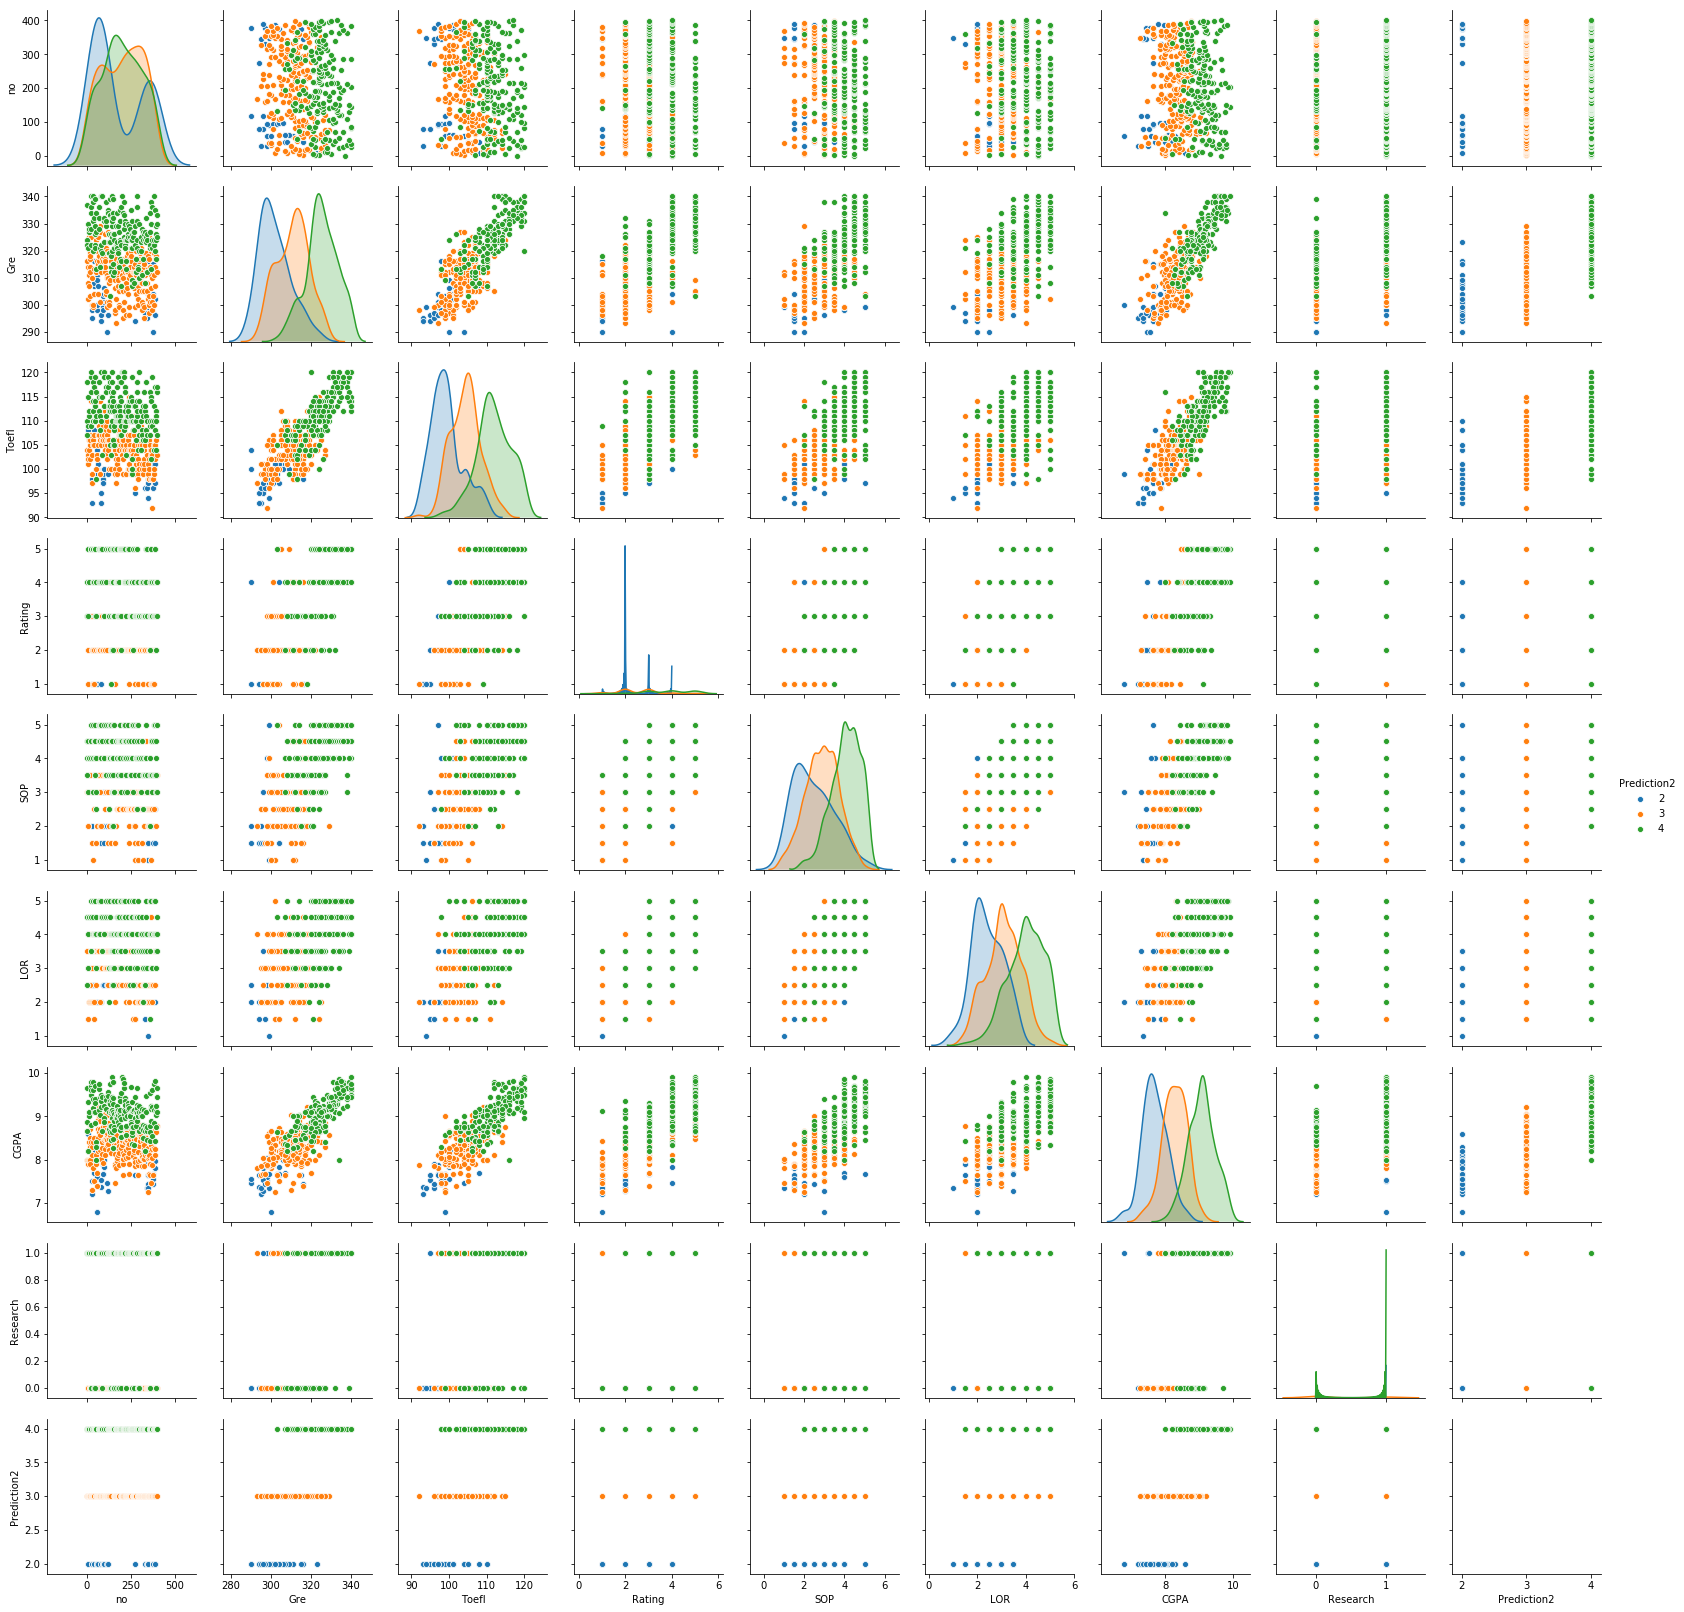

In [39]:
sns.pairplot(data=data,hue='Prediction2',diag_kind='kde')
plt.show()

# Predictive Analysis

# K Neighbours Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred1=knn.predict(X_test)
print(y_pred1)
y_pred1.size    

['Almost Certain' 'Almost Certain' 'Almost Certain' 'Almost Certain'
 'Almost Certain' 'Almost Certain' 'Almost Certain' 'Almost Certain'
 'Good Chance' 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Slight Chance' 'Almost Certain' 'Almost Certain'
 'Good Chance' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Good Chance' 'Almost Certain' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Good Chance' 'Good Chance' 'Almost Certain' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance'
 'Good Chance' 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance'
 'Good Chance' 'Slight Chance' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Almost Certain' 'Almost Certain'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Almost Certain' 'Almost Certain' 'Good Chance

160

In [41]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred1))

0.85


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
results=confusion_matrix(y_pred1,y_test)
print(results)
print(classification_report(y_pred1,y_test))

[[58  7  0]
 [ 2 71 15]
 [ 0  0  7]]
                precision    recall  f1-score   support

Almost Certain       0.97      0.89      0.93        65
   Good Chance       0.91      0.81      0.86        88
 Slight Chance       0.32      1.00      0.48         7

     micro avg       0.85      0.85      0.85       160
     macro avg       0.73      0.90      0.76       160
  weighted avg       0.91      0.85      0.87       160



In [43]:

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)
print(y_pred3)
y_pred3.size


['Almost Certain' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Almost Certain' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Slight Chance' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Good Chance' 'Almost Certain' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Good Chance' 'Good Chance' 'Almost Certain'
 'Slight Chance' 'Almost Certain' 'Good Chance' 'Good Chance'
 'Good Chance' 'Good Chance' 'Good Chance' 'Almost Certain' 'Good Chance'
 'Good Chance' 'Good Chance' 'Slight Chance' 'Slight Chance'
 'Slight Chance' 'Good Chance' 'Almost Certain' 'Good Chance'
 'Almost Certain' 'Almost Certain' 'Almost Certain' 'Good Chance'
 'Good Chance' 'Slight Chance' 'Almost Certain' 'Almost Certain'
 'Almost Certain' 'Good Chance

160

In [44]:
print(metrics.accuracy_score(y_test,y_pred3))

0.975


In [45]:
results=confusion_matrix(y_pred3,y_test)
print(results)
print(classification_report(y_pred3,y_test))

[[58  0  0]
 [ 2 78  2]
 [ 0  0 20]]
                precision    recall  f1-score   support

Almost Certain       0.97      1.00      0.98        58
   Good Chance       1.00      0.95      0.97        82
 Slight Chance       0.91      1.00      0.95        20

     micro avg       0.97      0.97      0.97       160
     macro avg       0.96      0.98      0.97       160
  weighted avg       0.98      0.97      0.98       160



In [46]:

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred4=knn.predict(X_test)
print(y_pred4) 
y_pred4.size

['Almost Certain' 'Almost Certain' 'Almost Certain' 'Almost Certain'
 'Almost Certain' 'Almost Certain' 'Almost Certain' 'Almost Certain'
 'Good Chance' 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Slight Chance' 'Almost Certain' 'Almost Certain'
 'Good Chance' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Slight Chance' 'Good Chance' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance'
 'Good Chance' 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance'
 'Slight Chance' 'Slight Chance' 'Good Chance' 'Slight Chance'
 'Almost Certain' 'Good Chance' 'Almost Certain' 'Almost Certain'
 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Almost Certain' 'Good Chance' 'Alm

160

In [47]:
print(metrics.accuracy_score(y_test,y_pred4))

0.775


In [48]:
results=confusion_matrix(y_pred4,y_test)
print(results)
print(classification_report(y_pred4,y_test))

[[47  7  0]
 [13 68 13]
 [ 0  3  9]]
                precision    recall  f1-score   support

Almost Certain       0.78      0.87      0.82        54
   Good Chance       0.87      0.72      0.79        94
 Slight Chance       0.41      0.75      0.53        12

     micro avg       0.78      0.78      0.78       160
     macro avg       0.69      0.78      0.71       160
  weighted avg       0.81      0.78      0.78       160



In [49]:
for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    print('Accuracy of K-Neighbour(i=',i,') =',metrics.accuracy_score(prediction,y_test))

Accuracy of K-Neighbour(i= 1 ) = 0.975
Accuracy of K-Neighbour(i= 2 ) = 0.85
Accuracy of K-Neighbour(i= 3 ) = 0.775
Accuracy of K-Neighbour(i= 4 ) = 0.79375
Accuracy of K-Neighbour(i= 5 ) = 0.84375
Accuracy of K-Neighbour(i= 6 ) = 0.80625
Accuracy of K-Neighbour(i= 7 ) = 0.8
Accuracy of K-Neighbour(i= 8 ) = 0.8
Accuracy of K-Neighbour(i= 9 ) = 0.80625
Accuracy of K-Neighbour(i= 10 ) = 0.7875


# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred2=logreg.predict(X_test)
print(y_pred2)
y_pred2.size    

['Almost Certain' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Almost Certain' 'Almost Certain' 'Almost Certain'
 'Good Chance' 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Good Chance' 'Almost Certain' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance'
 'Good Chance' 'Almost Certain' 'Almost Certain' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Almost Certain' 'Almost Certain'
 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance' 'Almost Certain'
 'Almost Certain' 'Almost Certain' 'Good Chance' 'Almost 

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


160

In [51]:
print(metrics.accuracy_score(y_test,y_pred2))

0.7


In [52]:
results=confusion_matrix(y_pred2,y_test)
print(results)
print(classification_report(y_pred2,y_test))

[[47 13  1]
 [13 65 21]
 [ 0  0  0]]
                precision    recall  f1-score   support

Almost Certain       0.78      0.77      0.78        61
   Good Chance       0.83      0.66      0.73        99
 Slight Chance       0.00      0.00      0.00         0

     micro avg       0.70      0.70      0.70       160
     macro avg       0.54      0.48      0.50       160
  weighted avg       0.81      0.70      0.75       160



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred7=model.predict(X_test)
print(y_pred7)

['Almost Certain' 'Good Chance' 'Good Chance' 'Almost Certain'
 'Almost Certain' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Almost Certain' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Almost Certain' 'Almost Certain' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Slight Chance' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Almost Certain' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Almost Certain' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Slight Chance' 'Almost Certain' 'Good Chance'
 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance'
 'Good Chance' 'Good Chance' 'Good Chance' 'Slight Chance' 'Slight Chance'
 'Slight Chance' 'Good Chance' 'Almost Certain' 'Good Chance'
 'Almost Certain' 'Almost Certain' 'Almost Certain' 'Slight Chance'
 'Good Chance' 'Slight Chance' 'Almost Certain' 'Almost Certain'
 'Almost Certain' 'Good Chance'

In [54]:
print(metrics.accuracy_score(y_test,y_pred2))

0.7


In [55]:
results=confusion_matrix(y_pred7,y_test)
print(results)
print(classification_report(y_pred7,y_test))

[[58  4  0]
 [ 2 72  4]
 [ 0  2 18]]
                precision    recall  f1-score   support

Almost Certain       0.97      0.94      0.95        62
   Good Chance       0.92      0.92      0.92        78
 Slight Chance       0.82      0.90      0.86        20

     micro avg       0.93      0.93      0.93       160
     macro avg       0.90      0.92      0.91       160
  weighted avg       0.93      0.93      0.93       160



# Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred5=gnb.predict(X_test)
print(y_pred5)
y_pred5.size
   

['Almost Certain' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Almost Certain' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Slight Chance' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Almost Certain' 'Almost Certain' 'Slight Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Slight Chance' 'Almost Certain' 'Good Chance'
 'Almost Certain' 'Almost Certain' 'Good Chance' 'Good Chance'
 'Slight Chance' 'Almost Certain' 'Slight Chance' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance'
 'Slight Chance' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Good Chance' 'Good Chance' 'Almost Certain'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance'
 'Slight Chance' 'Good Chance' 'Almost Certain' 'Almost Certain'
 'Almost Certain' 'Almost Certain' 'Good Chance' 'Good Chance'
 'Slight Chance' 'Slight Chance' 'Almost Certain' 'Almost Certain'
 'Almost Certain' 

160

In [57]:
print(metrics.accuracy_score(y_test,y_pred5))

0.74375


In [58]:
results=confusion_matrix(y_pred5,y_test)
print(results)
print(classification_report(y_pred5,y_test))

[[45  8  0]
 [15 61  9]
 [ 0  9 13]]
                precision    recall  f1-score   support

Almost Certain       0.75      0.85      0.80        53
   Good Chance       0.78      0.72      0.75        85
 Slight Chance       0.59      0.59      0.59        22

     micro avg       0.74      0.74      0.74       160
     macro avg       0.71      0.72      0.71       160
  weighted avg       0.75      0.74      0.74       160



# Support Vector Machines

In [59]:
from sklearn.svm import SVC
clf=SVC(kernel="linear")
clf.fit(X_train,y_train)
y_pred6=clf.predict(X_test)
print(y_pred6)
y_pred6.size   

['Almost Certain' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Almost Certain' 'Almost Certain' 'Almost Certain' 'Almost Certain'
 'Slight Chance' 'Almost Certain' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Almost Certain' 'Almost Certain' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Almost Certain' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Almost Certain'
 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance' 'Slight Chance'
 'Almost Certain' 'Good Chance' 'Almost Certain' 'Good Chance'
 'Good Chance' 'Good Chance' 'Almost Certain' 'Almost Certain'
 'Good Chance' 'Good Chance' 'Good Chance' 'Good Chance' 'Slight Chance'
 'Good Chance' 'Almost Certain' 'Almost Certain' 'Almost Certain'
 'Almost Certain' 'Good Chance' 'Good Chance' 'Good Chance'
 'Slight Chance' 'Almost Certain' 'Almost Certain' 'Almost Certain'
 'Good Chan

160

In [60]:
print(metrics.accuracy_score(y_test,y_pred6))

0.8125


In [61]:
results=confusion_matrix(y_pred6,y_test)
print(results)
print(classification_report(y_pred6,y_test))

[[46  8  0]
 [14 70  8]
 [ 0  0 14]]
                precision    recall  f1-score   support

Almost Certain       0.77      0.85      0.81        54
   Good Chance       0.90      0.76      0.82        92
 Slight Chance       0.64      1.00      0.78        14

     micro avg       0.81      0.81      0.81       160
     macro avg       0.77      0.87      0.80       160
  weighted avg       0.83      0.81      0.81       160



In [62]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
def fun():
    lis1=[]
    a1=serialno.get()
    a2=gre.get()
    a3=toefl.get()
    a4=rating.get()
    a5=sop.get()
    a6=lor.get()
    a7=cgpa.get()
    a8=research.get()

    lis1.append(a1)
    lis1.append(a2)
    lis1.append(a3)
    lis1.append(a4)
    lis1.append(a5)
    lis1.append(a6)
    lis1.append(a7)
    lis1.append(a8)
    
    ind=['SerialNo','Gre','Toefl','Rating','Sop','Lor','Cgpa','Research']
    test_x1=pd.DataFrame(lis1,index=ind)
    
    
   
    prediction=knn.predict(test_x1.T) 
    if prediction=='Good Chance':
        lab=Label(f1,text="RESULT= Good Chance",font = ('arial', 14, 'bold'),bd = 14, anchor = "w",bg='yellow')
    elif prediction=='Slight Chance': 
        lab=Label(f1,text="RESULT= Slight Chance",font = ('arial', 14, 'bold'),bd = 14, anchor = "w",bg='red')
    else:    
        lab=Label(f1,text="RESULT= Almost Certain",font = ('arial', 14, 'bold'),bd = 14, anchor = "w",bg='green')
    lab.grid(row=9,column=1)


    
#Reset Function will reset the entry widgets
#It is submenu in 'File' Menu
def reset():
    serialno.set("")
    gre.set("")
    toefl.set("")
    rating.set("")
    sop.set("")
    lor.set("")
    cgpa.set("")
    research.set("")
    lab=Label(f1,text="                                       ",font = ('arial', 14, 'bold'),bd = 14, anchor = "w")
    lab.grid(row=9,column=1)
    
    

In [63]:
# import tkinter module
from tkinter import *

# import other necessery modules
import time
import datetime

root=Tk()
root.geometry("1000x700")
root.title('Graduation Prognosis')

filename=PhotoImage(file="C:\\Users\\HP\\back.png")
background_label=Label(root,image=filename)
background_label.place(x=0,y=0,relwidth=1,relheight=1)
#Top Frame for title and Time
tops = Frame(root, width = 1600, relief = SUNKEN)
tops.pack(side = TOP)
 
#Left Frame for label,Entries and Button    
f1 = Frame(root, width = 800, height = 700,relief = SUNKEN)
f1.pack(side = LEFT)

#Right Frame for Graphs



localtime = time.asctime(time.localtime(time.time()))  #for time

#Title label
labelinfo = Label(tops, font = ('helvetica', 33, 'bold'), text = "  Graduation \n Prediction",fg = "Black", bd = 10, anchor='w')             
labelinfo.grid(row = 0, column = 0)
#Time Label
labelinfo = Label(tops, font=('arial', 14, 'bold'),text = localtime, fg = "Steel Blue",bd = 10, anchor = 'w')               
labelinfo.grid(row = 1, column = 0)



#Creating the Menu
menu1=Menu(root)
root.config(menu=menu1)
subMenu1=Menu(menu1)

#File Menu
menu1.add_cascade(label="File",menu=subMenu1)       #main menu
subMenu1.add_command(label="Reset",command=reset)        #submenus
subMenu1.add_command(label="Exit",command=root.destroy)

#graph Menu                              
#graphMenu=Menu(menu1)                                               # main menu 2
#menu1.add_cascade(label="Graphs",menu=graphMenu)                    #sub menus
#graphMenu.add_command(label="Count_Plot",command=Count)
#graphMenu.add_command(label="Histogram_Plot",command=hist)
#graphMenu.add_command(label="Violin_Plot",command=violin)
#graphMenu.add_command(label="Scatter_Plot",command=scatter)
#graphMenu.add_command(label="HeatMap",command=heat)



#Labels
label0=Label(f1,font = ('arial', 13, 'bold'),text="SERIAL NO",bd = 10, anchor = "w")
label0.grid(row=0,column=0,sticky=E)
label1=Label(f1,text="GRE",font = ('arial', 13, 'bold'),bd = 14, anchor = "w")
label1.grid(row=1,column=0,sticky=E)
label2=Label(f1,text="TOEFL",font = ('arial', 13, 'bold'),bd = 14, anchor = "w")
label2.grid(row=2,column=0,sticky=E)
label3=Label(f1,text="RATING",font = ('arial', 13, 'bold'),bd = 14, anchor = "w")
label3.grid(row=3,column=0,sticky=E)
label4=Label(f1,text="SOP",font = ('arial', 13, 'bold'),bd = 14, anchor = "w")
label4.grid(row=4,column=0,sticky=E)
label5=Label(f1,text="LOR",font = ('arial', 13, 'bold'),bd = 14, anchor = "w")
label5.grid(row=5,column=0,sticky=E)
label6=Label(f1,text="CGPA",font = ('arial', 13, 'bold'),bd = 14, anchor = "w")
label6.grid(row=6,column=0,sticky=E)
label7=Label(f1,text="RESEARCH",font = ('arial', 13, 'bold'),bd = 14, anchor = "w")
label7.grid(row=7,column=0,sticky=E)

#Text Variables fro Entry
serialno = StringVar()
gre = StringVar()
toefl= StringVar()
rating= StringVar()
sop= StringVar()
lor= StringVar()
cgpa= StringVar()
research= StringVar()

#Entry Widget
entry0=Entry(f1,textvariable =serialno , font = ('arial', 12, 'bold'), bd = 8, insertwidth =4,bg = "white", justify = 'right')
entry1=Entry(f1,textvariable = gre, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,bg = "white", justify = 'right')
entry2=Entry(f1,textvariable = toefl, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,bg = "white", justify = 'right')
entry3=Entry(f1,textvariable = rating, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,bg = "white", justify = 'right')
entry4=Entry(f1,textvariable = sop, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,bg = "white", justify = 'right')
entry5=Entry(f1,textvariable = lor, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,bg = "white", justify = 'right')
entry6=Entry(f1,textvariable = cgpa, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,bg = "white", justify = 'right')
entry7=Entry(f1,textvariable = research, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,bg = "white", justify = 'right')

entry0.grid(row=0,column=1)
entry1.grid(row=1,column=1)
entry2.grid(row=2,column=1)
entry3.grid(row=3,column=1)
entry4.grid(row=4,column=1)
entry5.grid(row=5,column=1)
entry6.grid(row=6,column=1)
entry7.grid(row=7,column=1)

#Button 
button=Button(f1,text = "Show Result", command=fun, padx = 16, pady = 8, bd = 8, fg = "black",
font = ('arial', 14, 'bold'), width = 12, bg = "sky blue")
button.grid(row=8,column=1)


root.mainloop()